# Decision Trees

A decision tree separates predicitons into different *nodes*, where the root node is at depth=0 and the leaf nodes make class predictions.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()

X = iris.data[:, 2:] # petal length and width 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

**Note**: Decision trees don't require scaling or centering at all. 

A node's **gini** attribute measures its *impurity*: Whether or not all training instances it applies to belong in the same class

SKLearn uses a CART algorithm, which produces binary trees. Each nonleaf node has two children, meaning it "asks yes or no questions". Other algorithms can produce trees that are nonbinary

Look at the binary vertical and horizontal decision lines:

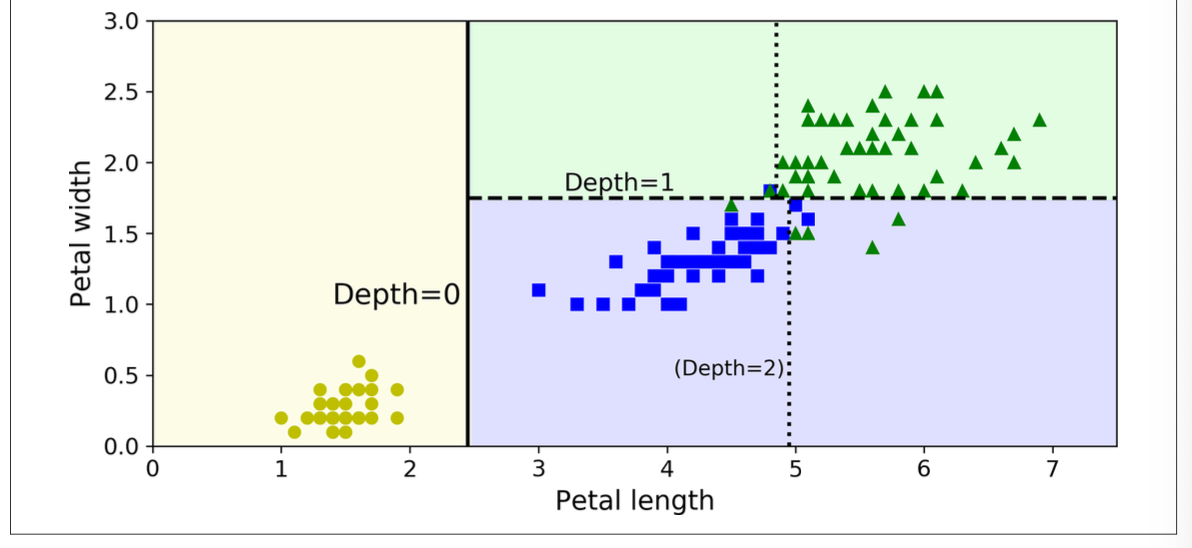

This is known as a *white box model*, as it is easy to understand what is going on. 

It can also *predict probabilites* by the number of training instances in each node. For example:

In [2]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [3]:
tree_clf.predict([[5,1.5]])

array([1])

## Cart Training Algorithm

*Classification and Regression Tree* algorithm. The training set is split into two subsets using a feature *$k$* and a threshold $t_k$ (Petal length $\leq$ 2.45 cm). How does it choose these? It searches for pair $(k,t_k)$ that yields the purest subsets weighted by size. 

Cost function:

$$G_i=1-\sum^n_{k=1}p_{i,k}^2$$

Here, $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node

$J(k, t_k) = \frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{Right}$
\begin{cases}
G_{left/right} \text{ measures the impurity of left/right subset}\\
m_{left/right} \text{ measures the # of instances of left/right subset}
\end{cases}

This is known as a **greedy algorithm**. It searches for an optimum split at top level, repeats, and repeats. Does not check whether this split will lead to lowest possible impurity several levels down.

Entropy can also be used as a measure of impurity. Entropy is 0 when a set only contains instances of 1 class. 


**Entropy:**
$$H_i=-\sum_{k=1}^np_{i,k}\log_2(p_{i,k})$$

Here, $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node

## Regularization Hyperparameters

Linear/polynomial models make *assumptions* about data beforehand - that it is linear, polynomial, etc. Decision trees do not, and are therefore called **nonparametric models**.

**Parametric Model**: There are a predetermined number of parameters, limiting its degrees of freedom. In a **nonparametric model**, the parameters are not determined prior to training.

As you may be able to guess, nonparametric models can more easily *overfit* data because the DOF are not limited. We must *limit the DOF* in order to reduce overfitting.

Possible regularization hyperparameters include
- `max_depth`: Tautologically, it reduces the max depth of the nodes.
- `min_samples_split`: Minimum number of samples a node must have before it splits. A minimum cost function cannot be found, for example, where there is 1 instance by itself
- `min_samples_leaf`: Minimum number of samples a leaf must have
- `min_weight_fraction_leaf`: Same as `min_samples_leaf` but is a fraction of total number of weighted instances
- `max_leaf_nodes`
- `max_features`

Some models work by growing the entire tree and then deleting statistically insignifigant nodes through a process known as **pruning**.

## Regression

lets train one to see how it works

In [4]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

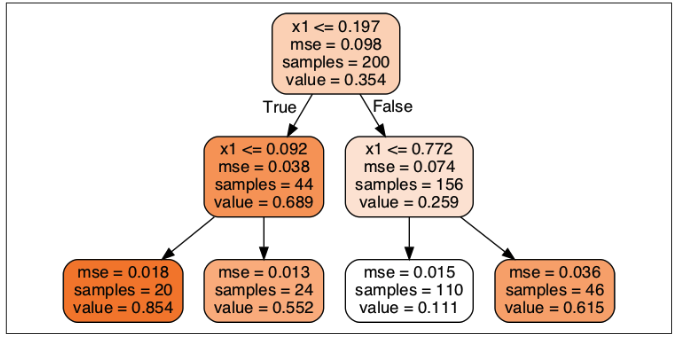

It is similar to quantizing a function with various *step functions*

Instead of minimizing a glini function, the mass weighted MSE on each side of the line is minimized.

$$J(k,t_k) = \frac{m_{left}}{m}MSE_{left}+\frac{m_{right}}{m}MSE_{right}$$ 
Where $k$ is a single feature and $t_k$ is a threshold for that feature

These are also prone to overfitting without regularization. 

## Instability

Trees like *orthogonal decision boundaries*. This makes them **sensitive to rotation**

More generally, they are sensitive to small variations in training data. 

## Exercises

**What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?**
Instances are split into two groups recursively. If a set had 2 instances, max depth = 1. If it has 4, max depth = 2. 8, max depth = 3. We see the equation $\log_2[\text{instances}]$. $$\log_2[1e6] \sim 20$$

**Is a node’s Gini impurity generally lower or greater than its parent’s? Is it gener‐ ally lower/greater, or always lower/greater?**

A node's impurity is generally lower than its parents. However, due to the mass-weighted nature of the cost function, a small sized node may have a higher impurity on order to allow a sister node to have a low impurity

**If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?**
Yes. Increasing min* and decreasing max* parameters are methods of regularization

**If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?**
Not necessarily. Decision trees are for the most part unaffected by scaling.

**If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?** Referring to the big O notation, it is $O(\log_2[n])$. $\log_2[10] \sim 3$ times

### **Train and fine-tune a Decision Tree for the moons dataset by following these steps:**
- Use `make_moons(n_samples=10000, noise=0.4)` to generate a moons dataset.


- Use `train_test_split()` to split the dataset into a training set and a test set.


- Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.


- Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [5]:
from sklearn.datasets import make_moons

In [7]:
X, y = make_moons(n_samples=10000, noise=0.4)
X.shape

(10000, 2)

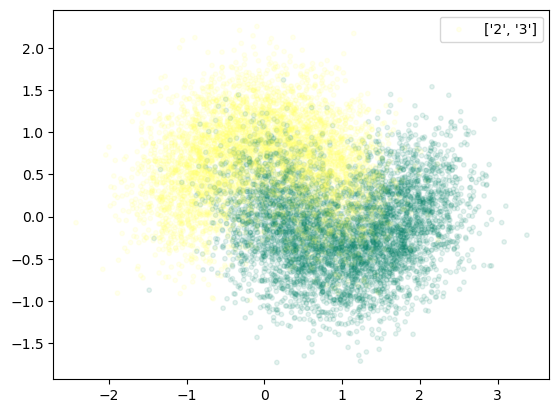

In [8]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

s= plt.scatter(X[:,0], X[:,1], alpha=.1, 
            sizes=10*np.ones(10000), c=y, cmap="summer_r", 
               label=["2","3"])
plt.legend()
plt.show()

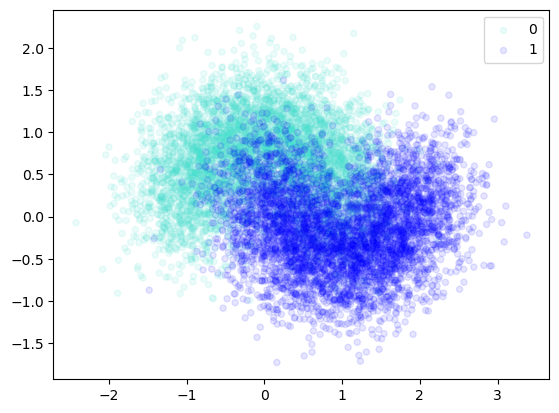

In [9]:
fig, ax = plt.subplots()
scatter_x = X[:,0]
scatter_y = X[:,1]
group = np.array(y)

colors = ["turquoise", "blue"]

for c, g in enumerate(np.unique(group)):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g, color=colors[c],
              alpha = .1, sizes = 20*np.ones(10000))
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [11]:
params = {
    "max_leaf_nodes": [None, 5, 10, 15, 20, 25, 30],
    "criterion": ["gini", "entropy"],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4]
}

DT_clf = DecisionTreeClassifier()

grid = GridSearchCV(DT_clf,param_grid=params, cv=5)
grid.fit(X_train, y_train)
grid.best_params_



{'criterion': 'gini', 'max_leaf_nodes': 5, 'min_weight_fraction_leaf': 0.0}

In [12]:
params2 = {
    "max_leaf_nodes": np.arange(10,20,1),
    "criterion": ["gini", "entropy"],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4]
}

grid2 = GridSearchCV(DT_clf, param_grid=params2, cv=5)
grid2.fit(X_train, y_train)
grid2.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 13, 'min_weight_fraction_leaf': 0.0}

In [13]:
best = grid2.best_estimator_
best.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
preds = best.predict(X_test)
accuracy_score(y_test, preds)

0.8475

In [14]:
from sklearn.model_selection import ShuffleSplit
splitter = ShuffleSplit(n_splits = 1000, test_size=.25)


evals = []
for i, (train_index, test_index) in enumerate(splitter.split(X[:134], y=y[:134])):
    
    z = (train_index, test_index)
    X_ss_train, y_ss_train = X[z[0]], y[z[0]]
    X_ss_test, y_ss_test = X[z[1]], y[z[1]]
    
    temp_tree = best
    temp_tree.fit(X_ss_train, y_ss_train)
    evaluation = accuracy_score(y_ss_test, temp_tree.predict(X_ss_test))
    evals.append(evaluation)
sum(evals)/len(evals)

0.8203823529411776

In [15]:
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode

splitter = ShuffleSplit(n_splits = 1000, test_size=.25)


trees = []
for i, (train_index, test_index) in enumerate(splitter.split(X[:134], y=y[:134])):
    
    z = (train_index, test_index)
    X_ss_train, y_ss_train = X[z[0]], y[z[0]]
    X_ss_test, y_ss_test = X[z[1]], y[z[1]]
    
    temp_tree = best
    temp_tree.fit(X_ss_train, y_ss_train)
    
    trees.append(temp_tree)
    
y_preds = np.empty([len(trees), X_test.shape[0]])

for tree_index, tree in enumerate(trees):
    y_preds[tree_index] = tree.predict(X_test)

y_pred_majority_votes, n_votes = mode(y_preds, axis=0, keepdims=True)
accuracy_score(y_test, y_pred_majority_v
               otes.resize([-1, 1]))

ValueError: negative dimensions not allowed